# Atividade 2
## Revisão de probabilidade

In [1]:
# Imports
from IPython.display import display, Markdown
import statsmodels.api as sm
import pandas as pd
import statistics
import collections

---
### 1. Os diâmetros de oito mancais selecionados ao acaso são os seguintes (em mm): <br>
    50,001 50,002 49,998 50,006 50,005 49,996 50,003 50,004
### a.  Calcule a média amostral. <br>
### b.  Calcule o desvio-padrão amostral. <br>

In [2]:
diametros_mancais = [50.001, 50.002, 49.998, 50.006, 50.005, 49.996, 50.003, 50.004]
media = statistics.mean(diametros_mancais)
desvio_padrao = statistics.stdev(diametros_mancais)

display(Markdown(
    f'a. Média amostral é {media:.4f} <br>'
    f'b. Desvio-padrão amostral é {desvio_padrao:.4f}'
    ))

a. Média amostral é 50.0019 <br>b. Desvio-padrão amostral é 0.0034

---
### 2. O tempo de vida até falhar em horas de um componente eletrônico sujeito a um teste de durabilidade acelerado é mostrado abaixo para uma amostra com tamanho n = 40. Para acelerar a falha no teste, as unidades experimentais são testadas sob uma temperatura elevada.
        127 125 131 124 129 121 142 151 160 125
        124 123 120 119 128 133 137 124 142 123
        121 136 140 137 125 124 128 129 130 122
        118 131 125 133 141 125 140 132 129 126
### a. Calcule a média amostral e o desvio-padrão.
### b. Construa o histograma.
### c. Ache a mediana e os quartis. 

a. A média amostral é 130.00 horas e o desvio padrão é 8.92 horas <br>b. Histograma: <br>

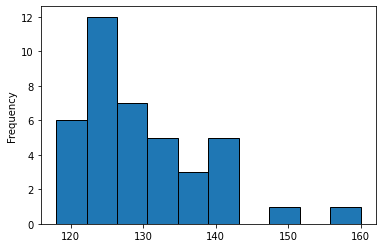

In [3]:
tempos_de_vida = pd.Series([127, 125, 131, 124, 129, 121, 142, 151, 160, 125, 124, 123, 120, 119, 128, 133, 137, 124, 142, 123, 121, 136, 140, 137, 125, 124, 128, 129, 130, 122, 118, 131, 125, 133, 141, 125, 140, 132, 129, 126])
media = tempos_de_vida.mean()
desvio_padrao = tempos_de_vida.std()

display(Markdown(
    f'a. A média amostral é {media:.2f} horas e o desvio padrão é {desvio_padrao:.2f} horas <br>'
    f'b. Histograma: <br>'
))
tempos_de_vida.plot.hist(ec="black");

In [4]:
quartis = tempos_de_vida.quantile([.25, .5, .75])
display(Markdown(f'c. Quartis são:'))
display(Markdown(quartis.to_markdown(headers=["Quartil", "Tempo de Vida (hr)"])))

c. Quartis são:

|   Quartil |   Tempo de Vida (hr) |
|----------:|---------------------:|
|      0.25 |               124    |
|      0.5  |               128    |
|      0.75 |               133.75 |

---

### 3) Os dados abaixo são leituras do rendimento de um processo químico em dias sucessivos (leia da esquerda para a direita). Faça o histograma dos dados, comente o aspecto do histograma e verifique se o histograma lembra alguma distribuição de probabilidade conhecida.
    94,1 87,3 94,1 92,4 84,6 85,4 93,2 84,1 92,1 90,6
    83,6 86,6 90,6 90,1 96,4 89,1 85,4 91,7 91,4 95,2
    88,2 88,8 89,7 87,5 88,2 86,1 86,4 86,4 87,6 84,2
    86,1 94,3 85,0 85,1 85,1 85,1 95,1 93,2 84,9 84,0
    89,6 90,5 90,0 86,7 87,3 93,7 90,0 95,6 92,4 83,0
    89,6 87,7 90,1 88,3 87,3 95,3 90,3 90,6 94,3 84,1
    86,6 94,1 93,1 89,4 97,3 83,7 91,2 97,8 94,6 88,6
    96,8 82,9 86,1 93,1 96,3 84,1 94,4 87,3 90,4 86,4
    94,7 82,6 96,1 86,4 89,1 87,6 91,1 83,1 98,0 84,5


<AxesSubplot:ylabel='Frequency'>

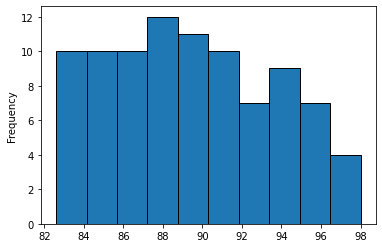

In [5]:
arquivo_dataset = "datasets/Atividade2-Excercicio3.txt"
rendimentos_dataframe = pd.read_csv(arquivo_dataset, sep='\s+', header=None, decimal=",")
rendimentos_series = pd.Series([rendimento for rendimentos_linha in rendimentos_dataframe.values for rendimento in rendimentos_linha])
rendimentos_series.plot.hist(ec='black');


---
### 4) Considere o rendimento do processo químico do exercício anterior. Calcule a média amostral e o desvio padrão.

In [6]:
media = rendimentos_series.mean()
desvio_padrao = rendimentos_series.std()

display(Markdown(f'A média é {media:.2f} e o desvio padrão é {desvio_padrao:.2f}'))

A média é 89.48 e o desvio padrão é 4.16

---
### 5) Suponha que dois dados não-viciados são lançados e uma variável aleatória observada, digamos X, que corresponde a soma das duas faces superiores. Descreva o espaço amostral do experimento e determine a função de probabilidade da v.a. X.

In [7]:
faces_dado = range(1,7)
dadoA = pd.DataFrame({"a": faces_dado, 'key': 1})
dadoB = pd.DataFrame({"b": faces_dado, 'key': 1})
combinacoes = pd.merge(dadoA, dadoB, on="key").drop(columns='key')
combinacoes["a,b"] = "(" + combinacoes.a.astype("str") + "," + combinacoes.b.astype("str") + ")"
combinacoes["soma"] = combinacoes.a + combinacoes.b

display(Markdown(
    f'O espaço amostral é: <br>'
    f'$$\Omega=\{{{combinacoes["a,b"].to_string(index=False)}\}}$$'
))


O espaço amostral é: <br>$$\Omega=\{(1,1)
(1,2)
(1,3)
(1,4)
(1,5)
(1,6)
(2,1)
(2,2)
(2,3)
(2,4)
(2,5)
(2,6)
(3,1)
(3,2)
(3,3)
(3,4)
(3,5)
(3,6)
(4,1)
(4,2)
(4,3)
(4,4)
(4,5)
(4,6)
(5,1)
(5,2)
(5,3)
(5,4)
(5,5)
(5,6)
(6,1)
(6,2)
(6,3)
(6,4)
(6,5)
(6,6)\}$$

In [10]:
quantidade_combinacoes = len(combinacoes)
possiveis_somas = combinacoes["soma"].unique()
quantidades_somas = combinacoes.groupby("soma").count()
distribuicao = pd.DataFrame({"X=x": possiveis_somas, "P(X=x)": quantidades_somas["a,b"] / quantidade_combinacoes})
distribuicao["P(X<=x)"] = distribuicao["P(X=x)"].cumsum()

display(Markdown(distribuicao.to_markdown(index=False)))

|   X=x |    P(X=x) |   P(X<=x) |
|------:|----------:|----------:|
|     2 | 0.0277778 | 0.0277778 |
|     3 | 0.0555556 | 0.0833333 |
|     4 | 0.0833333 | 0.166667  |
|     5 | 0.111111  | 0.277778  |
|     6 | 0.138889  | 0.416667  |
|     7 | 0.166667  | 0.583333  |
|     8 | 0.138889  | 0.722222  |
|     9 | 0.111111  | 0.833333  |
|    10 | 0.0833333 | 0.916667  |
|    11 | 0.0555556 | 0.972222  |
|    12 | 0.0277778 | 1         |

---
### 6) Ache a média e a variância da v.a. do exercício anterior.

In [17]:
media = sum(distribuicao["X=x"] * distribuicao["P(X=x)"])
variancia = sum( ((distribuicao["X=x"] ** 2) * distribuicao["P(X=x)"]) ) - (media ** 2)

display(Markdown(f'A média é {media:.2f} e a variância é {variancia:.2f}'))

A média é 7.00 e a variância é 5.83